<a href="https://colab.research.google.com/github/taehohoho/LESSON/blob/master/211001_CNN_Dogs_and_Cats_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!nvidia-smi

Fri Oct  1 02:38:30 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import tensorflow
tensorflow.__version__

'2.6.0'

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'

/bin/bash: ls -l /content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip: No such file or directory


In [7]:
!unzip /content/drive/MyDrive/Colab\ Notebooks/datasets/dogs_and_cats_small.zip

Archive:  /content/drive/MyDrive/Colab Notebooks/datasets/dogs_and_cats_small.zip
  inflating: test/cats/cat.1501.jpg  
  inflating: test/cats/cat.1502.jpg  
  inflating: test/cats/cat.1503.jpg  
  inflating: test/cats/cat.1504.jpg  
  inflating: test/cats/cat.1505.jpg  
  inflating: test/cats/cat.1506.jpg  
  inflating: test/cats/cat.1507.jpg  
  inflating: test/cats/cat.1508.jpg  
  inflating: test/cats/cat.1509.jpg  
  inflating: test/cats/cat.1510.jpg  
  inflating: test/cats/cat.1511.jpg  
  inflating: test/cats/cat.1512.jpg  
  inflating: test/cats/cat.1513.jpg  
  inflating: test/cats/cat.1514.jpg  
  inflating: test/cats/cat.1515.jpg  
  inflating: test/cats/cat.1516.jpg  
  inflating: test/cats/cat.1517.jpg  
  inflating: test/cats/cat.1518.jpg  
  inflating: test/cats/cat.1519.jpg  
  inflating: test/cats/cat.1520.jpg  
  inflating: test/cats/cat.1521.jpg  
  inflating: test/cats/cat.1522.jpg  
  inflating: test/cats/cat.1523.jpg  
  inflating: test/cats/cat.1524.jpg  
  infl

In [8]:
!ls -l

total 20
drwx------ 5 root root 4096 Oct  1 02:38 drive
drwxr-xr-x 1 root root 4096 Sep 16 13:40 sample_data
drwxr-xr-x 4 root root 4096 Oct  1 02:40 test
drwxr-xr-x 4 root root 4096 Oct  1 02:40 train
drwxr-xr-x 4 root root 4096 Oct  1 02:40 validation


In [9]:
train_dir = 'train'
valid_dir = 'validation'
test_dir = 'test'

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150, 150),
                                                    batch_size = 20,
                                                    class_mode = 'binary')

valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                    target_size = (150, 150),
                                                    batch_size = 20,
                                                    class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape= (150,150,3))

58900480/58889256 [==============================] - 1s 0us/step


In [14]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [15]:
print('conv_base 동결 전 훈련 가능 가중치의 종류:', len(conv_base.trainable_weights))

conv_base 동결 전 훈련 가능 가중치의 종류: 26


In [16]:
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


In [17]:
print('conv_base 동결 후 훈련 가능 가중치의 종류:', len(conv_base.trainable_weights))

conv_base 동결 후 훈련 가능 가중치의 종류: 6


In [18]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [20]:
from tensorflow.keras import models, layers
model = models.Sequential(name = 'CNN_VGG16')
model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [21]:
model.summary()

Model: "CNN_VGG16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout (Dropout)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [22]:
from tensorflow.keras import optimizers

model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.Adam(lr=0.000005),
              metrics = ['accuracy'])

In [24]:
%%time

Hist_dandc = model.fit(train_generator,
                       steps_per_epoch = 100,
                       epochs = 100,
                       validation_data = valid_generator,
                       validation_steps = 50)

Epoch 1/100
100/100 [==============================] - 21s 206ms/step - loss: 0.4413 - accuracy: 0.8085 - val_loss: 0.3499 - val_accuracy: 0.8550
Epoch 2/100
100/100 [==============================] - 21s 205ms/step - loss: 0.3202 - accuracy: 0.8690 - val_loss: 0.2775 - val_accuracy: 0.8830
Epoch 3/100
100/100 [==============================] - 21s 205ms/step - loss: 0.2492 - accuracy: 0.9005 - val_loss: 0.2390 - val_accuracy: 0.8980
Epoch 4/100
100/100 [==============================] - 21s 206ms/step - loss: 0.1949 - accuracy: 0.9225 - val_loss: 0.2220 - val_accuracy: 0.9040
Epoch 5/100
100/100 [==============================] - 21s 206ms/step - loss: 0.1683 - accuracy: 0.9325 - val_loss: 0.2094 - val_accuracy: 0.9110
Epoch 6/100
100/100 [==============================] - 21s 205ms/step - loss: 0.1399 - accuracy: 0.9475 - val_loss: 0.1997 - val_accuracy: 0.9150
Epoch 7/100
100/100 [==============================] - 21s 206ms/step - loss: 0.1156 - accuracy: 0.9590 - val_loss: 0.1961 -

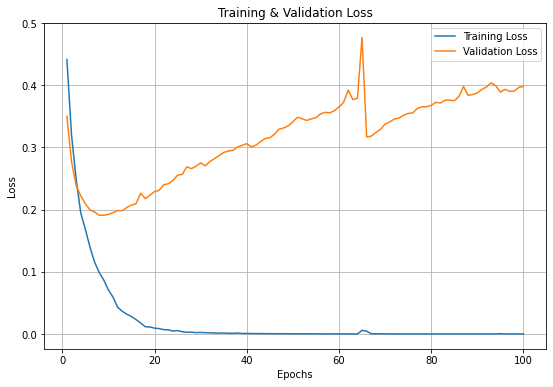

In [26]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss'])+1)

plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

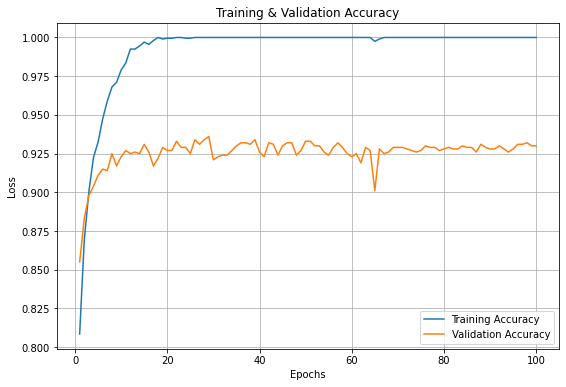

In [27]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss'])+1)

plt.figure(figsize = (9,6))
plt.plot(epochs, Hist_dandc.history['accuracy'])
plt.plot(epochs, Hist_dandc.history['val_accuracy'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

In [28]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size = (150, 150),
                                                  batch_size = 20,
                                                  class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [30]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:5f}'.format(accuracy))

50/50 [==============================] - 6s 121ms/step - loss: 0.4277 - accuracy: 0.9270
Loss = 0.42771
Accuracy = 0.927000


In [31]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
model.save('/content/drive/My Drive/Colab Notebooks/models/005_dogs_and_cats_small.h5')

In [35]:
!ls -l /content/drive/My\ Drive/Colab\ Notebooks/models

/bin/bash: ls -l /content/drive/My Drive/Colab Notebooks/models: No such file or directory


In [39]:
from tensorflow.keras.models import load_model

model_google = load_model('/content/drive/My Drive/Colab Notebooks/models/005_dogs_and_cats_fine_tuning.h5')

SyntaxError: ignored

In [ ]:
loss, accuracy = model_google.evaluate(test_generator,
                                       steps = 50)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))